<a href="https://colab.research.google.com/github/pranay2310/AirBnB-bookings-Analysis/blob/main/Pranay_Flight_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv("/content/drive/MyDrive/trainable_complete2.xls")
data.sample(10)

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
257128,48941,06:40,16:20,Air India,B,Hyderabad,3,Thiruvananthapuram,1,580,0,6,Morning_flight,16
130222,3064,19:55,21:00,IndiGo,E,Coimbatore,17,Chennai,0,65,0,19,Evening_flight,23
236863,13777,15:05,19:15,Air India,E,Coimbatore,29,Kochi,3,250,5,15,Afternoon_flight,20
178294,8971,06:40,06:50,Air India,E,Hyderabad,23,Goa,3,10,6,6,Morning_flight,7
285754,34605,16:00,23:35,Air India,B,Mumbai,15,Hyderabad,1,455,5,16,Evening_flight,19
294271,34823,21:35,11:55,Air India,B,Bhubaneswar,18,Hyderabad,1,860,1,21,Night_flight,8
15322,5895,07:40,12:55,Go Air,E,Kochi,4,Lucknow,1,315,1,7,Morning_flight,14
172811,8217,09:30,15:50,"Spicejet, IndiGo",E,Patna,22,Raipur,1,380,5,9,Morning_flight,13
252332,5484,12:20,20:00,IndiGo,E,Bagdogra,31,Ranchi,1,460,0,12,Afternoon_flight,1
95007,6581,19:25,01:40,IndiGo,E,Chandigarh,13,Kolkata,1,375,3,19,Evening_flight,20


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330938 entries, 0 to 330937
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              330938 non-null  int64 
 1   departure_time     330938 non-null  object
 2   arrival_time       330938 non-null  object
 3   Airline            330938 non-null  object
 4   Cabin              330938 non-null  object
 5   Dept_city          330938 non-null  object
 6   Dept_date          330938 non-null  int64 
 7   arrival_city       330938 non-null  object
 8   stops              330938 non-null  int64 
 9   duration           330938 non-null  int64 
 10  weekday            330938 non-null  int64 
 11  dept_hours         330938 non-null  int64 
 12  Dept_flights_time  330938 non-null  object
 13  optimal_hours      330938 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 35.3+ MB


In [8]:
data.shape

(330938, 14)

In [9]:
data.isnull().sum()

Price                0
departure_time       0
arrival_time         0
Airline              0
Cabin                0
Dept_city            0
Dept_date            0
arrival_city         0
stops                0
duration             0
weekday              0
dept_hours           0
Dept_flights_time    0
optimal_hours        0
dtype: int64

In [10]:
data.describe()

,Price,Dept_date,stops,duration,weekday,dept_hours,optimal_hours
count,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000
mean,14074.894817,16.713064,1.278974,590.186636,2.902087,12.602539,12.568575
std,15968.136248,8.166245,0.802891,364.512309,2.088561,4.848977,6.882780
min,1579.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5450.000000,10.000000,1.000000,325.000000,1.000000,9.000000,7.000000
50%,7559.000000,17.000000,1.000000,515.000000,3.000000,12.000000,13.000000
75%,11742.000000,24.000000,2.000000,845.000000,5.000000,16.000000,18.000000
max,115432.000000,31.000000,6.000000,1435.000000,6.000000,23.000000,23.000000


In [11]:
data.duplicated().sum()

162

In [12]:
data = data.drop_duplicates( keep='first')

In [13]:
data.shape

(330776, 14)

## Feature 1 : Price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


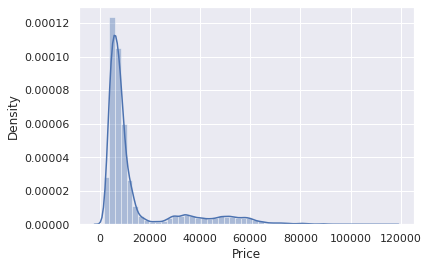

In [14]:
sns.distplot(data['Price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


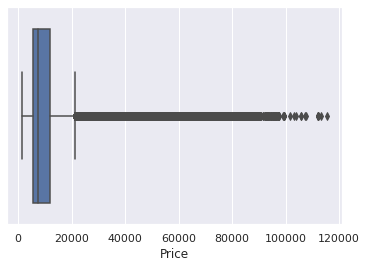

In [15]:
#create boxplot to check probable outliers
sns.boxplot(data.Price)
plt.xlabel('Price')
plt.show()

## Feature 4: Airline

In [16]:
data['Airline'].value_counts()

Air India              111779
IndiGo                  88266
Spicejet                26657
Go Air                  25835
Vistara                 14426
AirAsia                 13729
IndiGo, Air India        5012
Air India, IndiGo        4861
IndiGo, Go Air           4513
Vistara, Air India       3763
Spicejet, IndiGo         3672
Go Air, IndiGo           3556
IndiGo, Spicejet         3186
IndiGo, AirAsia          2728
AirAsia, IndiGo          2261
Air India, Go Air        2257
Air India, Vistara       1709
Vistara, IndiGo          1508
Go Air, Air India        1496
IndiGo, Vistara          1157
Vistara, Go Air           908
Spicejet, Air India       819
Air India, Spicejet       763
AirAsia, Air India        762
Air India, AirAsia        761
AirAsia, Go Air           732
Spicejet, Go Air          689
Spicejet, AirAsia         550
Go Air, Spicejet          464
AirAsia, Spicejet         379
Go Air, Vistara           376
Go Air, AirAsia           304
Vistara, AirAsia          284
Spicejet, 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


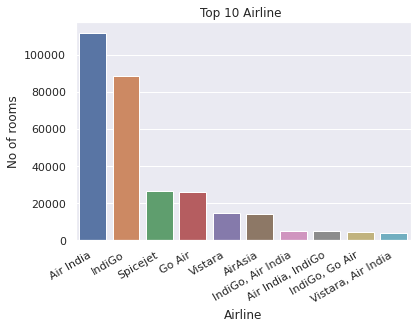

<Figure size 1152x1080 with 0 Axes>

In [17]:
sns.countplot( data.Airline, order =data.Airline.value_counts().iloc[:10].index).set_title('Top 10 Airline ') 
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.figure(figsize=(16,15)) 
plt.show()

## Feature 5 : Cabin

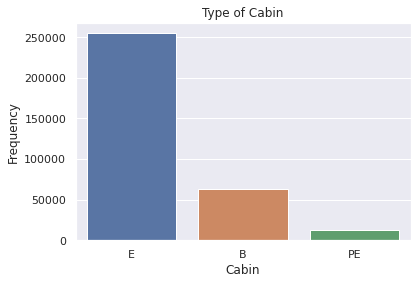

In [18]:
sns.countplot(data=data, x='Cabin')
plt.ylabel('Frequency')
plt.xlabel('Cabin')
plt.title('Type of Cabin')
plt.show()

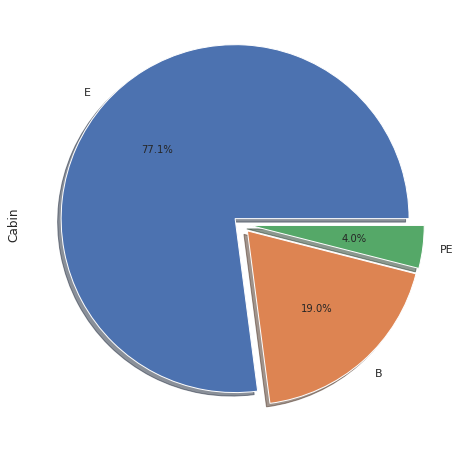

In [19]:
data['Cabin'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))

## Feature 6 : Dept_city

In [20]:
data['Dept_city'].unique()

array(['New Delhi', 'Mumbai', 'Bengaluru', 'Hyderabad', 'Chennai',
       'Kolkata', 'Kochi', 'Goa', 'Pune', 'Guwahati', 'Lucknow', 'Jaipur',
       'Patna', 'Thiruvananthapuram', 'Bhubaneswar', 'Kozhikode',
       'Bagdogra', 'Nagpur', 'Varanasi', 'Indore', 'Coimbatore',
       'Srinagar', 'Visakhapatnam', 'Ranchi', 'Amritsar', 'Chandigarh',
       'Raipur', 'Mangalore', 'Port Blair', 'Tiruchirappalli'],
      dtype=object)

In [21]:
data['Dept_city'].value_counts()

New Delhi             21849
Mumbai                19875
Bengaluru             17572
Hyderabad             16553
Kolkata               16303
Chennai               15175
Patna                 13469
Srinagar              13054
Goa                   12870
Lucknow               12584
Guwahati              12166
Amritsar              11817
Kochi                 11324
Pune                  10892
Jaipur                10649
Varanasi              10501
Bhubaneswar           10491
Bagdogra              10340
Chandigarh             9430
Ranchi                 9426
Visakhapatnam          9270
Indore                 8549
Raipur                 8455
Nagpur                 7480
Port Blair             7362
Mangalore              6842
Coimbatore             6284
Thiruvananthapuram     5440
Kozhikode              2854
Tiruchirappalli        1900
Name: Dept_city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


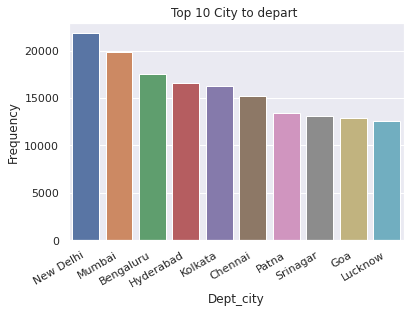

<Figure size 1152x1080 with 0 Axes>

In [22]:
sns.countplot( data.Dept_city, order =data.Dept_city.value_counts().iloc[:10].index).set_title('Top 10 City to depart ') 
plt.xticks(rotation=30,ha='right')
plt.ylabel('Frequency')
plt.figure(figsize=(16,15)) 
plt.show()

## Feature 7: Dept_date

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


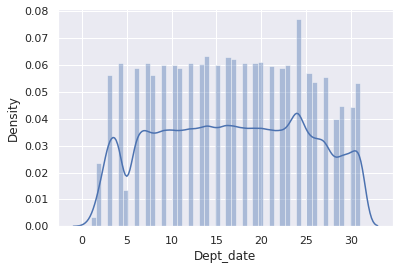

In [23]:
sns.distplot(data.Dept_date)

In [24]:
data['Dept_date'].value_counts()

24    15281
14    12557
16    12529
17    12323
20    12106
12    12052
7     12042
19    12040
4     12030
18    12028
13    11954
23    11928
15    11888
9     11873
10    11868
21    11811
22    11706
11    11680
6     11661
25    11282
8     11157
3     11134
27    11014
26    10616
31    10574
29     8870
30     8840
28     7917
2      4639
5      2661
1       715
Name: Dept_date, dtype: int64

In [25]:
data

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330933,9338,09:50,23:50,Spicejet,PE,Port Blair,30,Mumbai,1,840,6,9,Morning_flight,15
330934,9338,09:50,08:20,Spicejet,PE,Port Blair,30,Mumbai,1,1350,6,9,Morning_flight,15
330935,11092,09:50,09:05,Spicejet,PE,Port Blair,30,Bengaluru,1,1395,6,9,Morning_flight,15
330936,5588,09:50,12:05,Spicejet,PE,Port Blair,30,Chennai,0,135,6,9,Morning_flight,15


## Feauture 8: arrival_city

In [26]:
data['arrival_city'].value_counts()

New Delhi              19889
Mumbai                 18950
Bengaluru              16758
Kolkata                16466
Chennai                15657
Hyderabad              15585
Patna                  13698
Lucknow                13243
Bhubaneswar            12243
Goa                    12195
Guwahati               11875
Amritsar               11628
Srinagar               11277
Jaipur                 10872
Kochi                  10669
Pune                   10536
Visakhapatnam          10399
Varanasi               10358
Raipur                 10049
Ranchi                  9925
Chandigarh              9658
Bagdogra                9124
Port Blair              8809
Indore                  8768
Nagpur                  7986
Coimbatore              7971
Mangalore               6473
Thiruvananthapuram      5304
Tiruchirappalli         2632
Kozhikode               1779
Name: arrival_city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


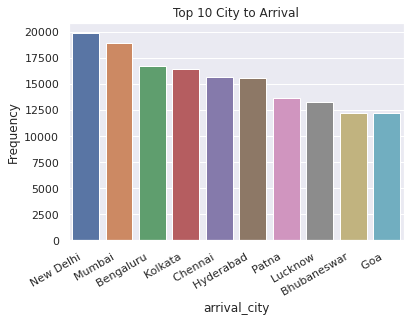

<Figure size 1152x1080 with 0 Axes>

In [27]:
sns.countplot( data.arrival_city, order =data.arrival_city.value_counts().iloc[:10].index).set_title('Top 10 City to Arrival') 
plt.xticks(rotation=30,ha='right')
plt.ylabel('Frequency')
plt.figure(figsize=(16,15)) 
plt.show()

## Feature 9 : Stop

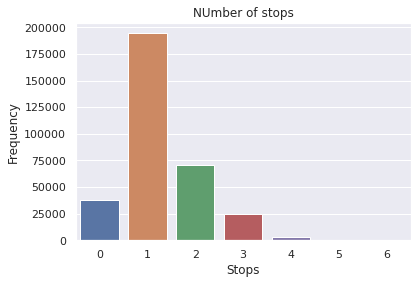

In [28]:
sns.countplot(data=data, x='stops')
plt.ylabel('Frequency')
plt.xlabel('Stops')
plt.title('NUmber of stops')
plt.show()

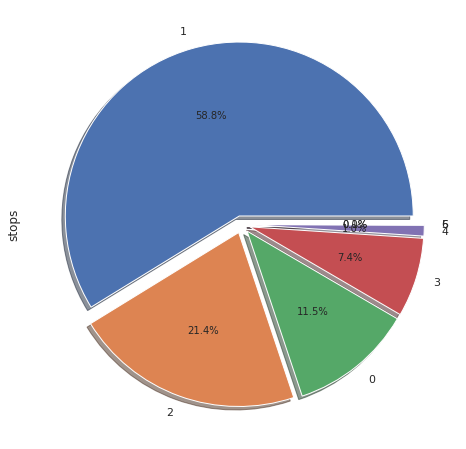

In [29]:
data['stops'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))

## Feature 10 : weekday

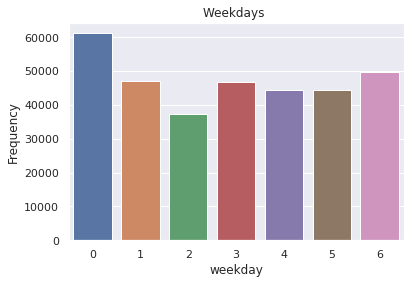

In [30]:
sns.countplot(data=data, x='weekday')
plt.ylabel('Frequency')
plt.xlabel('weekday')
plt.title('Weekdays ')
plt.show()

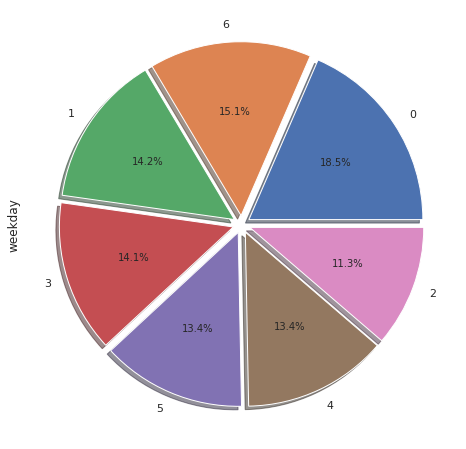

In [31]:
data['weekday'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))

In [32]:
data

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330933,9338,09:50,23:50,Spicejet,PE,Port Blair,30,Mumbai,1,840,6,9,Morning_flight,15
330934,9338,09:50,08:20,Spicejet,PE,Port Blair,30,Mumbai,1,1350,6,9,Morning_flight,15
330935,11092,09:50,09:05,Spicejet,PE,Port Blair,30,Bengaluru,1,1395,6,9,Morning_flight,15
330936,5588,09:50,12:05,Spicejet,PE,Port Blair,30,Chennai,0,135,6,9,Morning_flight,15


## Feature 11 : dept_hours

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


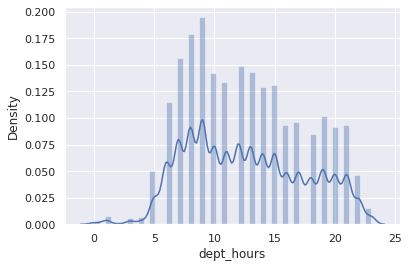

In [33]:
sns.distplot(data.dept_hours)

In [34]:
data['dept_hours'].value_counts()

9     29652
8     27228
7     23836
12    22719
13    21832
10    21713
11    20304
15    20013
14    19703
6     17515
19    15518
17    14714
16    14279
21    14166
20    13984
18    12955
5      7569
22     7128
23     2296
1      1132
4      1019
3       929
0       448
2       124
Name: dept_hours, dtype: int64

## Feature 12 :Dept_flights_time

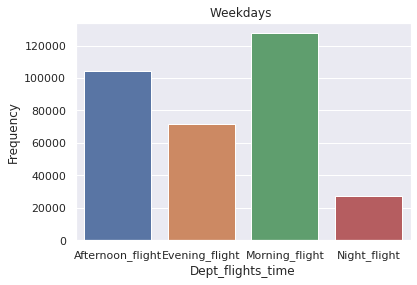

In [35]:
sns.countplot(data=data, x='Dept_flights_time')
plt.ylabel('Frequency')
plt.xlabel('Dept_flights_time')
plt.title('Weekdays ')
plt.show()

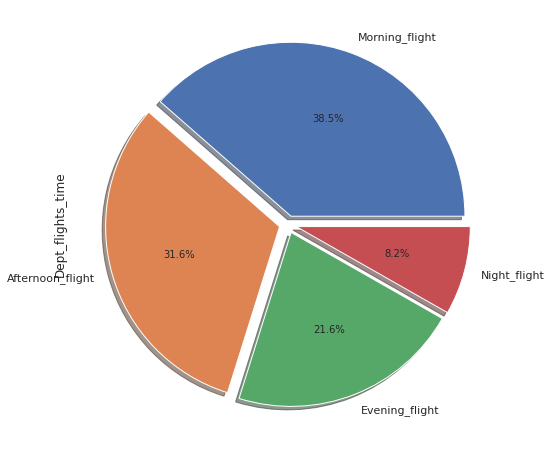

In [36]:
data['Dept_flights_time'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))

In [37]:
data

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330933,9338,09:50,23:50,Spicejet,PE,Port Blair,30,Mumbai,1,840,6,9,Morning_flight,15
330934,9338,09:50,08:20,Spicejet,PE,Port Blair,30,Mumbai,1,1350,6,9,Morning_flight,15
330935,11092,09:50,09:05,Spicejet,PE,Port Blair,30,Bengaluru,1,1395,6,9,Morning_flight,15
330936,5588,09:50,12:05,Spicejet,PE,Port Blair,30,Chennai,0,135,6,9,Morning_flight,15


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


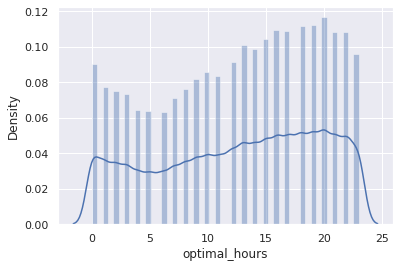

In [38]:
sns.distplot(data.optimal_hours)

In [39]:
data['optimal_hours'].value_counts()

20    17753
19    17043
18    17024
16    16621
17    16591
22    16491
21    16463
15    15905
13    15359
14    14994
23    14592
12    13887
0     13784
10    13035
11    12748
9     12465
1     11806
8     11577
2     11442
3     11167
7     10862
4      9834
5      9715
6      9618
Name: optimal_hours, dtype: int64

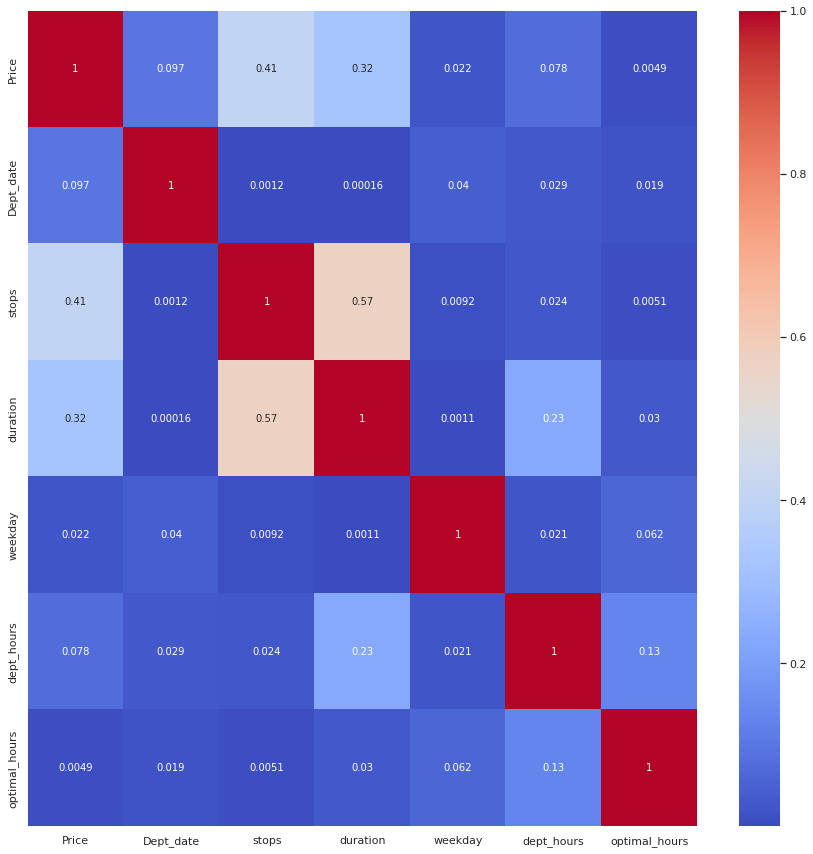

In [40]:
## Correlation
plt.figure(figsize=(15,15))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

## Feature Engineering

In [42]:
flight_data = data

In [43]:
flight_data.rename(columns = {'optimal_hours':'optimal_time'}, inplace=True)
flight_data.columns

Index(['Price', 'departure_time', 'arrival_time', 'Airline', 'Cabin',
       'Dept_city', 'Dept_date', 'arrival_city', 'stops', 'duration',
       'weekday', 'dept_hours', 'Dept_flights_time', 'optimal_time'],
      dtype='object')

In [44]:
#converting the departure_hour into hour and minute

flight_data["Dep_hour"] = pd.to_datetime(flight_data["departure_time"]).dt.hour
flight_data["Dep_min"] = pd.to_datetime(flight_data["departure_time"]).dt.minute
flight_data.drop(["departure_time"], axis = 1, inplace = True)
flight_data.drop(["dept_hours"], axis = 1, inplace = True)

In [45]:
flight_data["Arrival_hour"] = pd.to_datetime(flight_data["arrival_time"]).dt.hour

flight_data["Arrival_min"] = pd.to_datetime(flight_data["arrival_time"]).dt.minute

flight_data.drop(["arrival_time"], axis = 1, inplace = True)

In [46]:
flight_data.head()

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,optimal_time,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3112,AirAsia,E,New Delhi,1,Mumbai,1,350,5,Afternoon_flight,11,14,30,20,20
1,3113,Go Air,E,New Delhi,1,Mumbai,1,255,5,Evening_flight,13,16,55,21,10
2,3113,Go Air,E,New Delhi,1,Mumbai,1,260,5,Evening_flight,13,16,45,21,5
3,3113,Go Air,E,New Delhi,1,Mumbai,1,305,5,Morning_flight,4,7,55,13,0
4,3113,Go Air,E,New Delhi,1,Mumbai,1,320,5,Morning_flight,6,9,0,14,20


In [47]:

flight_data.shape

(330776, 15)

In [48]:
#Cabin type and neighbourhood_group based on price
t= flight_data.groupby(['Dept_flights_time','Cabin']).max('Price') 
t

Price  Dept_date  stops  duration  weekday  \
Dept_flights_time Cabin                                                
Afternoon_flight  B      107646         31      6      1435        6   
                  E       33684         31      5      1435        6   
                  PE      22750         30      3      1435        6   
Evening_flight    B      107098         31      5      1435        6   
                  E       23077         31      5      1435        6   
                  PE      24450         30      3      1435        6   
Morning_flight    B      115432         31      5      1435        6   
                  E       35016         31      5      1435        6   
                  PE      19516         30      2      1435        6   
Night_flight      B       95868         31      5      1425        6   
                  E       24438         31      5      1435        6   
                  PE      13197         30      1      1435        6   

                         optimal_time  Dep_hour  Dep_min  Arrival_hour  \
Dept_flights_time Cabin                                                  
Afternoon_flight  B                23        15       55            23   
                  E                23        15       55            23   
                  PE               23        15       55            23   
Evening_flight    B                23        20       55            23   
                  E                23        20       55            23   
                  PE               23        20       55            23   
Morning_flight    B                23        10       55            23   
                  E                23        10       55            23   
                  PE               23        10       55            23   
Night_flight      B                23        23       55            23   
                  E                23        23       55            23   
                  PE               23        22       55            23   

                         Arrival_min  
Dept_flights_time Cabin               
Afternoon_flight  B               55  
                  E               55  
                  PE              55  
Evening_flight    B               55  
                  E               55  
                  PE              55  
Morning_flight    B               55  
                  E               55  
                  PE              55  
Night_flight      B               55  
                  E               55  
                  PE              55

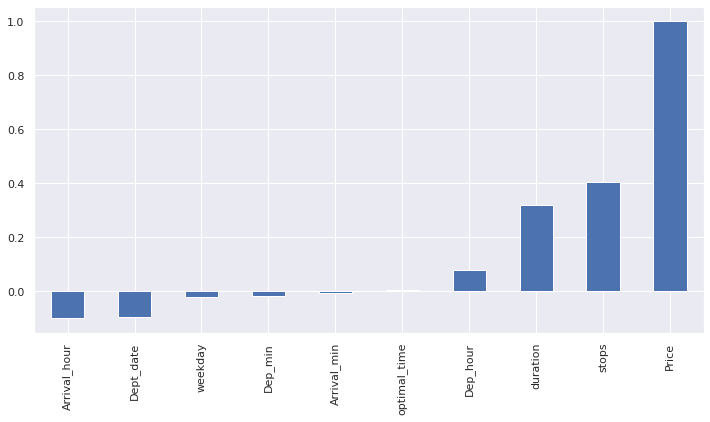

In [49]:
plt.figure(figsize=(12,6))
flight_data.corr()['Price'].sort_values().plot(kind='bar')

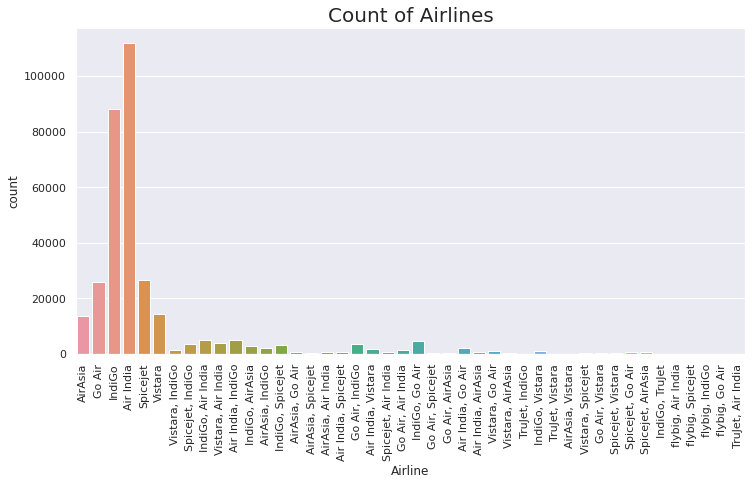

In [50]:

#lets see which airline company has highest counts
plt.figure(figsize=(12,6))
sns.countplot(x=flight_data['Airline'])
plt.title('Count of Airlines', size=20)
plt.xticks(rotation=90)
plt.show()

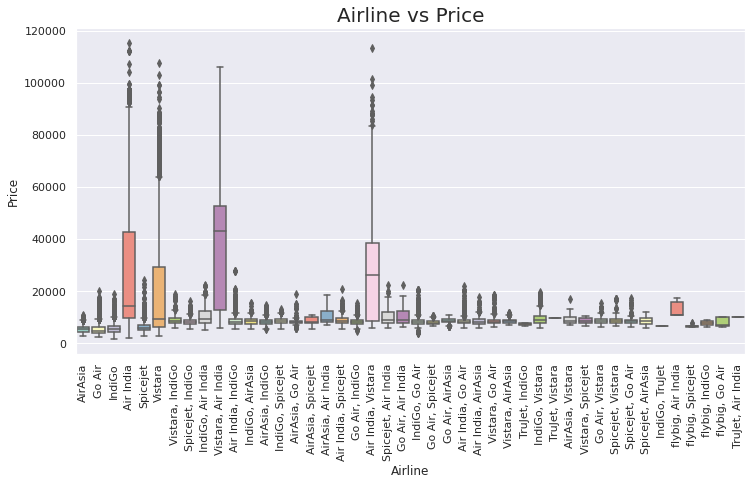

In [51]:
# lets check ariline and their prices
plt.figure(figsize=(12,6))
sns.boxplot(x = flight_data['Airline'], y = flight_data['Price'], palette='Set3')
plt.title('Airline vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

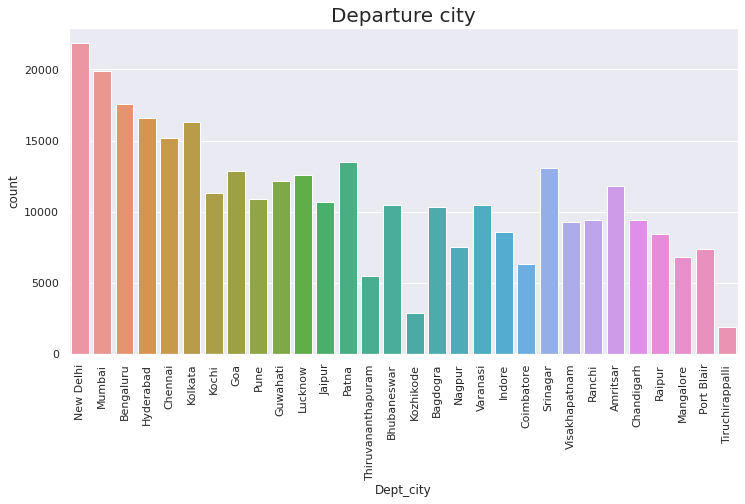

In [52]:
# lets see how many flight took off from dept_city 
plt.figure(figsize = (12,6))
sns.countplot(x = flight_data['Dept_city'])
plt.title('Departure city', size = 20)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Price vs Departure city')

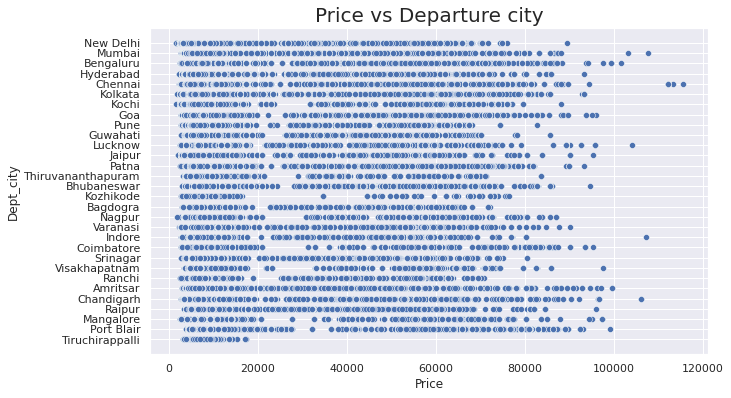

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='Dept_city',data = flight_data)
plt.title('Price vs Departure city', size = 20)

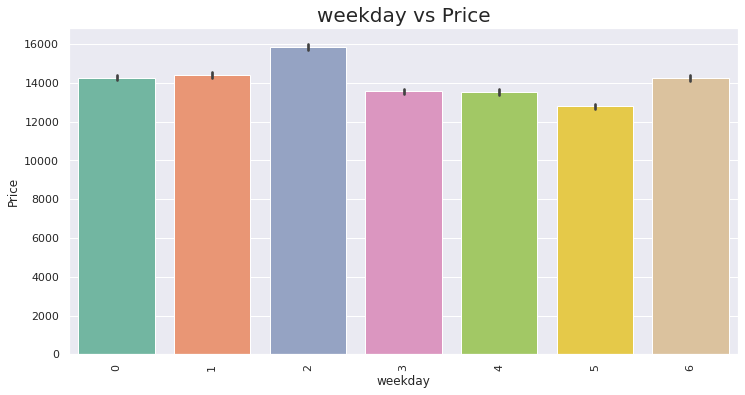

In [54]:
#weekday vs price
plt.figure(figsize = (12,6))
sns.barplot(x = flight_data['weekday'], y = flight_data['Price'], palette ='Set2')
plt.title('weekday vs Price', size = 20)
plt.xticks(rotation=90)
plt.show()

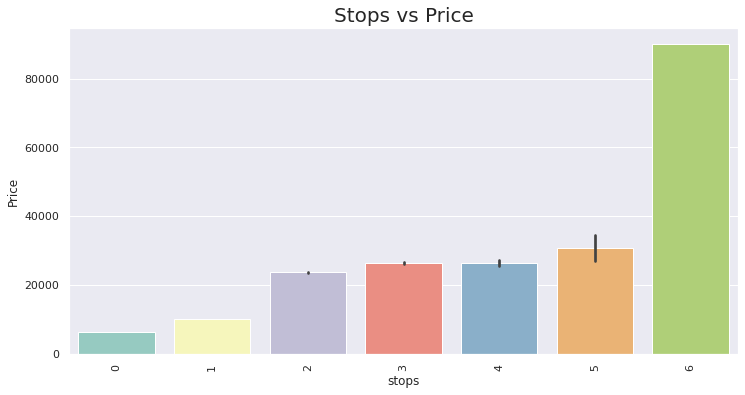

In [55]:
#stops vs price
plt.figure(figsize = (12,6))
sns.barplot(x = flight_data['stops'], y = flight_data['Price'], palette='Set3')
plt.title('Stops vs Price', size = 20)
plt.xticks(rotation=90)
plt.show()

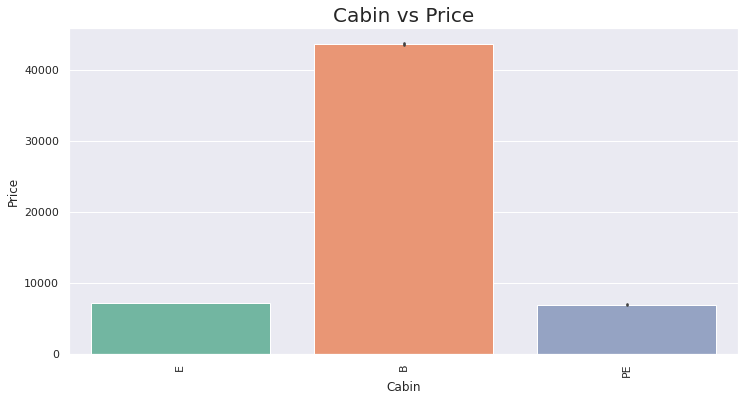

In [56]:
#Cabin vs Price
plt.figure(figsize = (12,6))
sns.barplot(x = flight_data['Cabin'], y = flight_data['Price'], palette ='Set2')
plt.title('Cabin vs Price', size = 20)
plt.xlabel("Cabin")
plt.xticks(rotation=90)
plt.show()

Pairplot of the pre processed data


<Figure size 576x288 with 0 Axes>

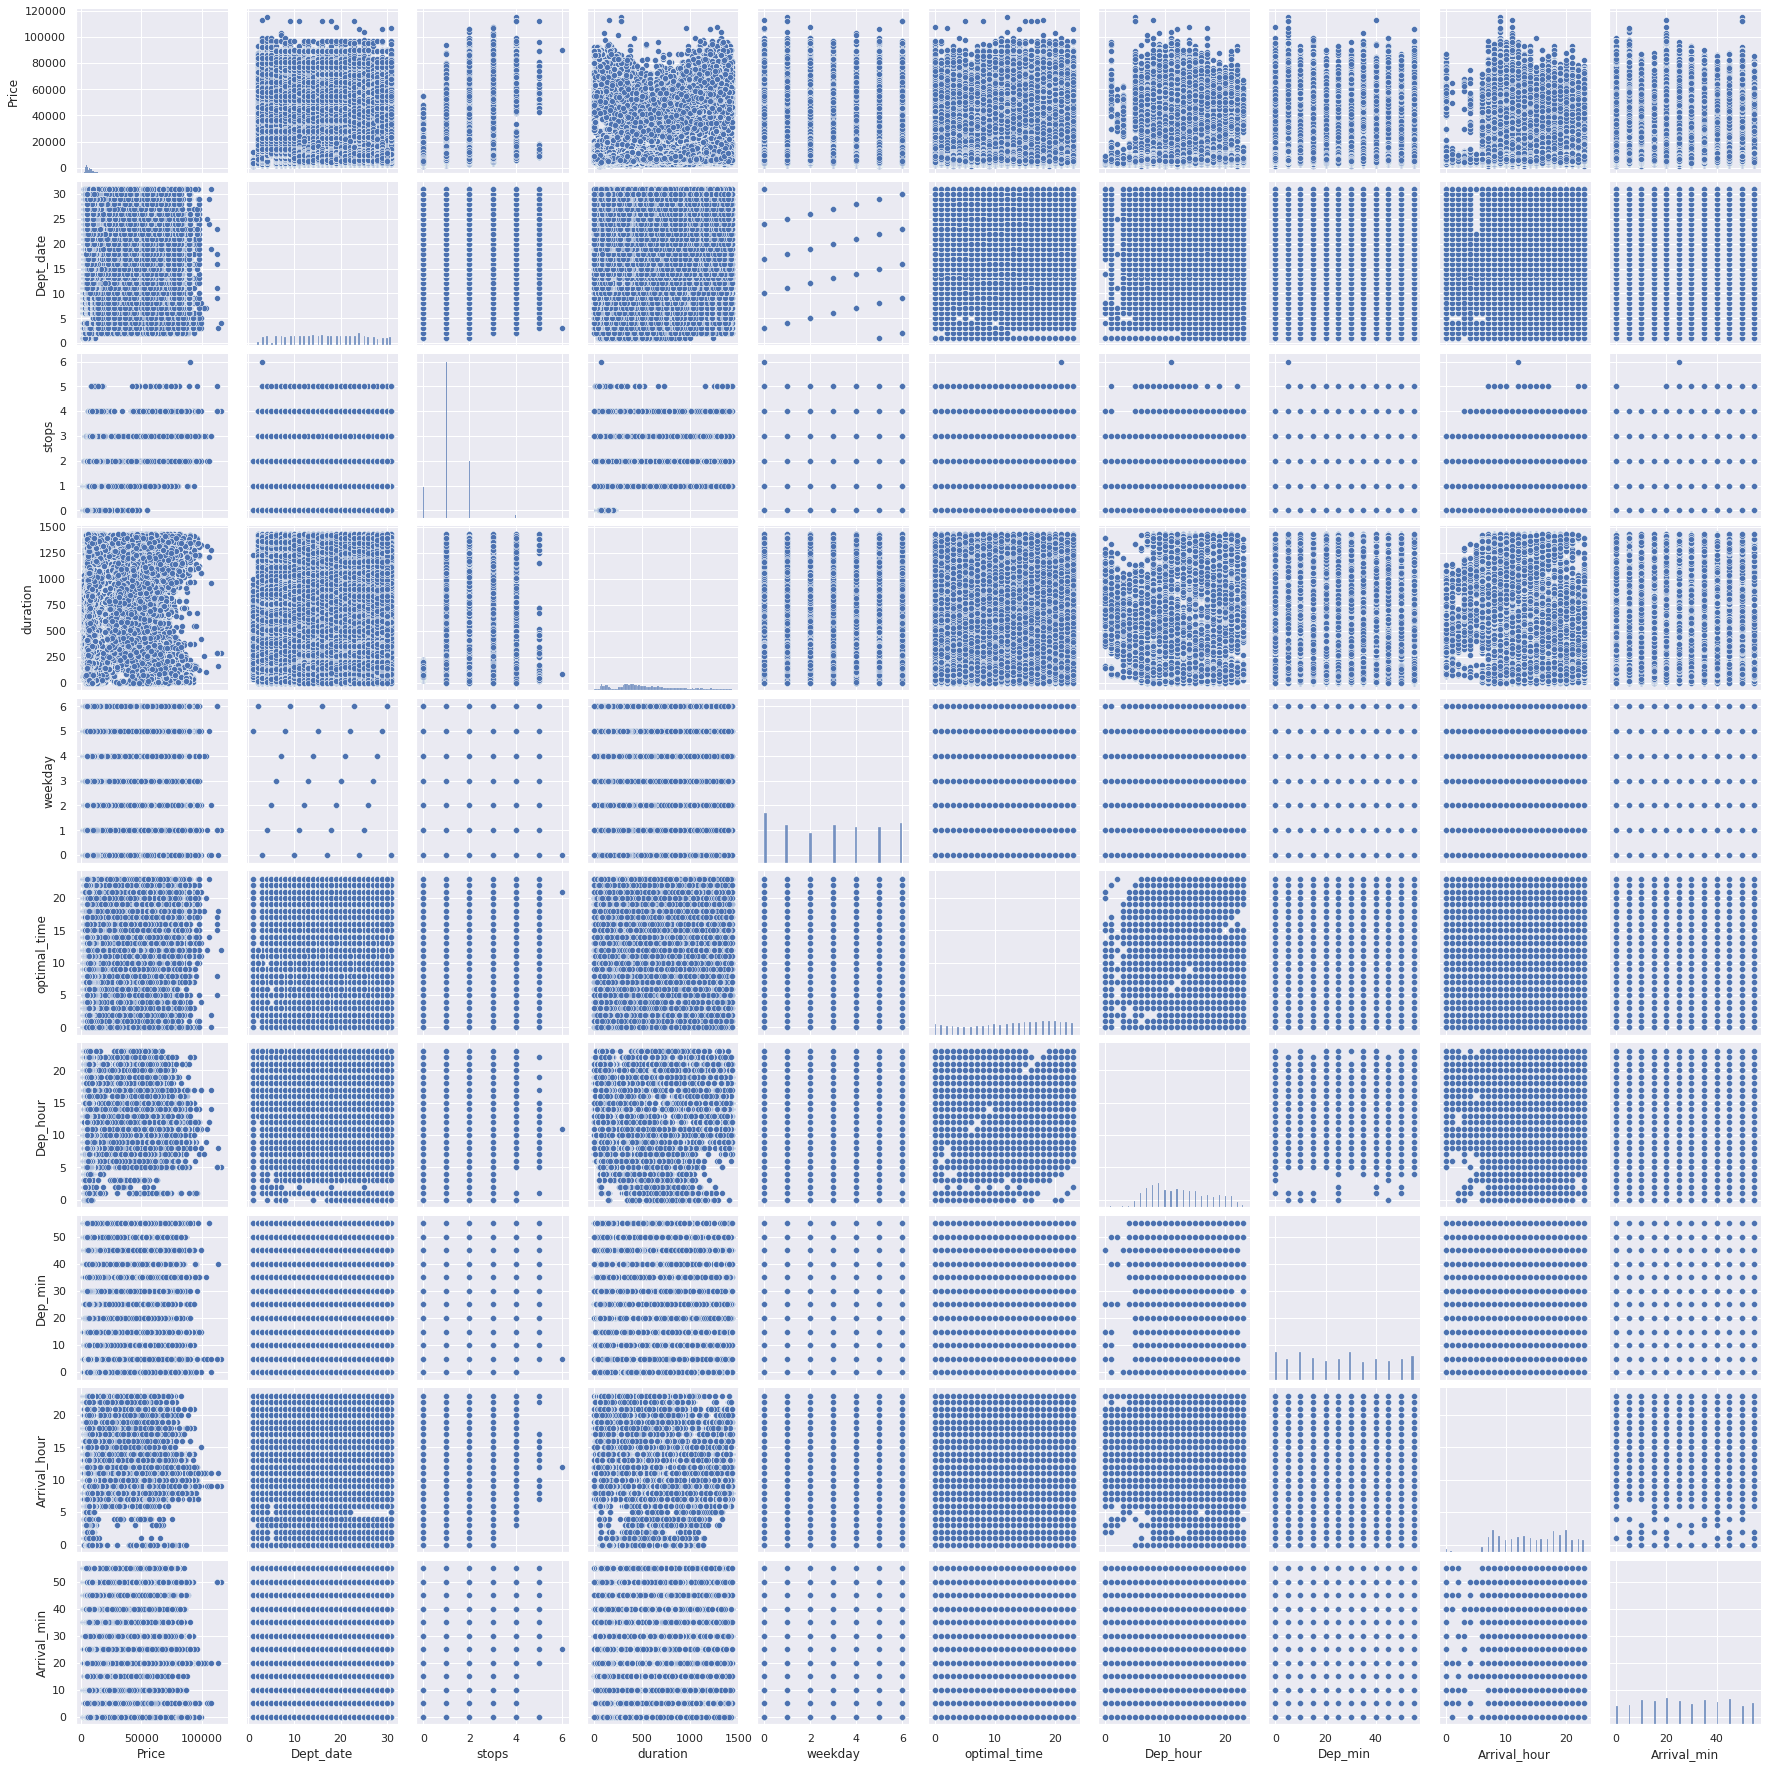

In [57]:
#Pair plot
print('Pairplot of the pre processed data')
plt.figure(figsize=(8,4))
sns.pairplot(flight_data)
plt.show()

In [58]:
flight_data_dummy= flight_data.copy()
flight_data_dummy.head()

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,optimal_time,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3112,AirAsia,E,New Delhi,1,Mumbai,1,350,5,Afternoon_flight,11,14,30,20,20
1,3113,Go Air,E,New Delhi,1,Mumbai,1,255,5,Evening_flight,13,16,55,21,10
2,3113,Go Air,E,New Delhi,1,Mumbai,1,260,5,Evening_flight,13,16,45,21,5
3,3113,Go Air,E,New Delhi,1,Mumbai,1,305,5,Morning_flight,4,7,55,13,0
4,3113,Go Air,E,New Delhi,1,Mumbai,1,320,5,Morning_flight,6,9,0,14,20


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mode = flight_data_dummy.select_dtypes(include ='object').columns

# For  Dataset
for i in var_mode:
    flight_data_dummy[i] = le.fit_transform(flight_data_dummy[i])

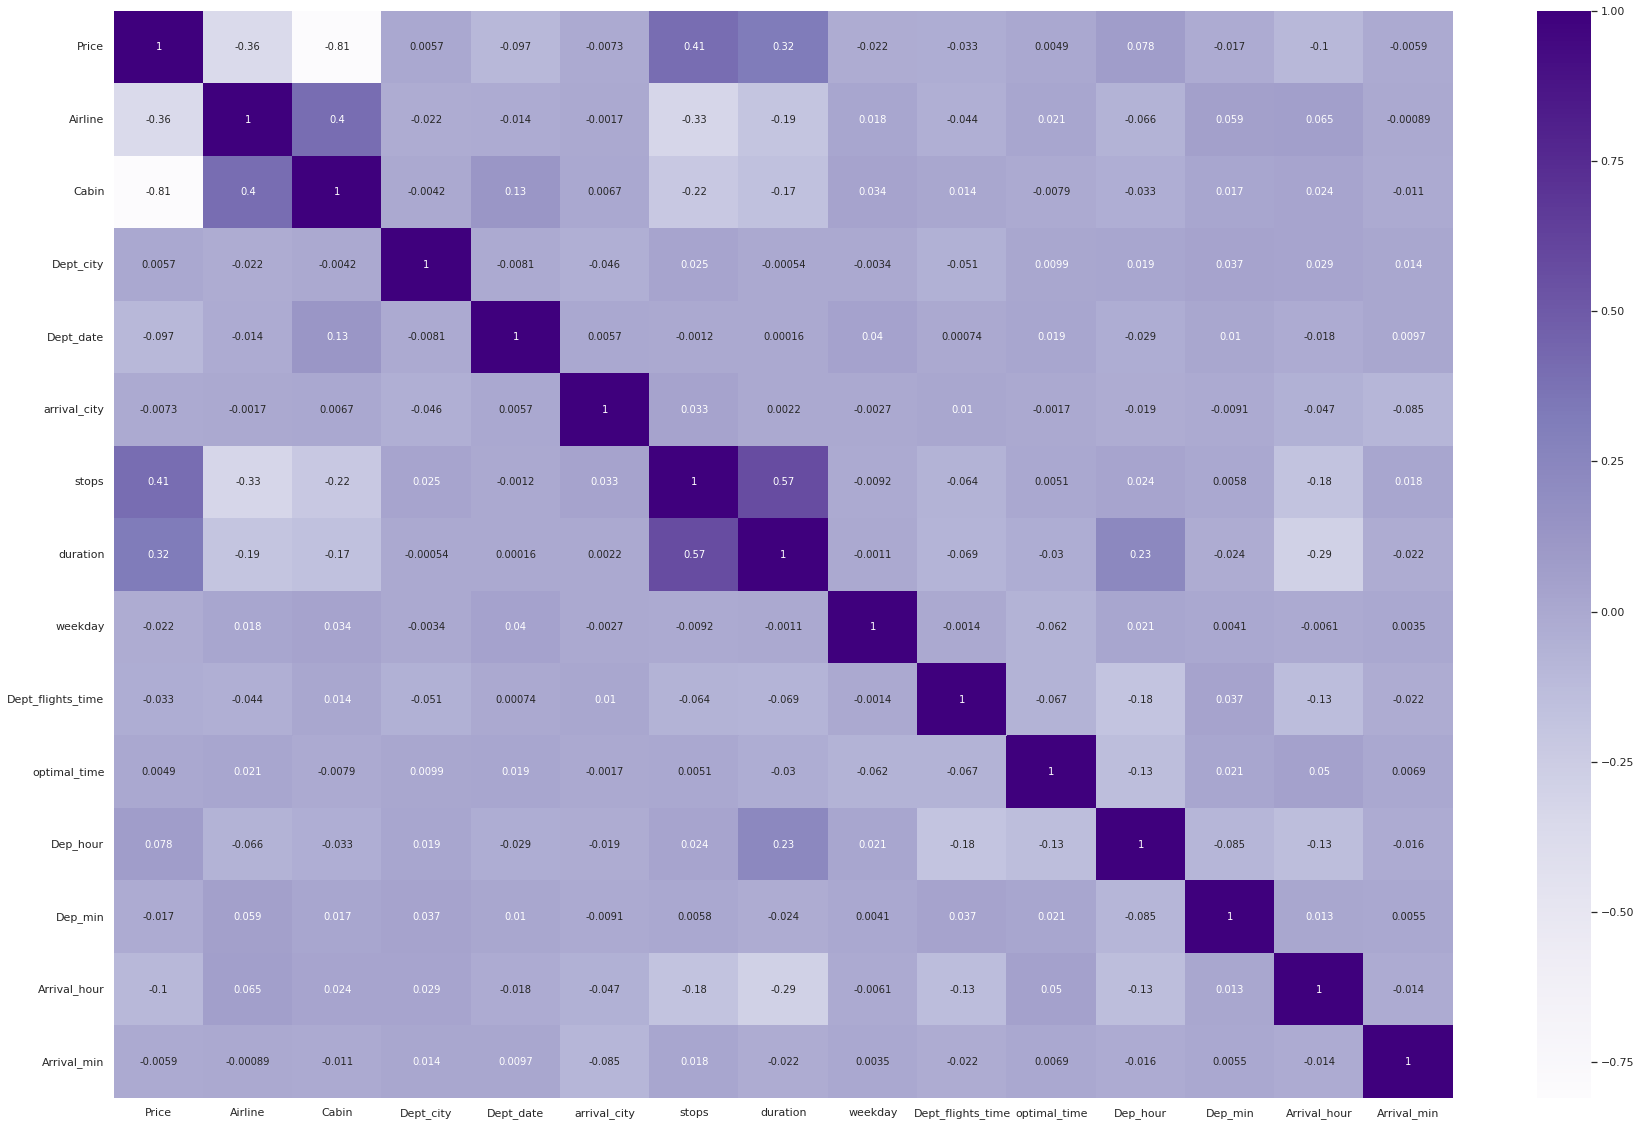

In [60]:
# Heatmap diagram
plt.figure(figsize=(30,20))
sns.heatmap(flight_data_dummy.corr(),annot=True, cmap="Purples")
plt.show()

In [61]:
flight_data_dummy.columns

Index(['Price', 'Airline', 'Cabin', 'Dept_city', 'Dept_date', 'arrival_city',
       'stops', 'duration', 'weekday', 'Dept_flights_time', 'optimal_time',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [62]:
X_t = flight_data_dummy.copy()

## Multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [64]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif_info['features'] = X_t.columns
vif_info.sort_values('VIF', ascending = True)

,VIF,features
9,2.462272,Dept_flights_time
8,2.881312,weekday
1,2.937644,Airline
12,3.212545,Dep_min
5,3.484166,arrival_city
14,3.545715,Arrival_min
3,3.568087,Dept_city
10,4.151338,optimal_time
4,5.058437,Dept_date
0,5.244475,Price


In [65]:
df_dummy1 = flight_data_dummy.copy()
df_dummy1['Dep_hour_dif'] = df_dummy1['duration'] - df_dummy1['Arrival_hour']
df_dummy1['duration_diff'] = df_dummy1['Arrival_hour'] - df_dummy1['Dep_hour']
X_t = df_dummy1.drop(['Cabin','Dep_hour','Dep_min','Arrival_hour','Arrival_min','duration','stops','Price','Dept_flights_time','weekday'],axis = 1)
X_t.head()

,Airline,Dept_city,Dept_date,arrival_city,optimal_time,Dep_hour_dif,duration_diff
0,6,19,1,17,11,330,6
1,12,19,1,17,13,234,5
2,12,19,1,17,13,239,5
3,12,19,1,17,4,292,6
4,12,19,1,17,6,306,5


In [66]:
X_t

,Airline,Dept_city,Dept_date,arrival_city,optimal_time,Dep_hour_dif,duration_diff
0,6,19,1,17,11,330,6
1,12,19,1,17,13,234,5
2,12,19,1,17,13,239,5
3,12,19,1,17,4,292,6
4,12,19,1,17,6,306,5
...,...,...,...,...,...,...,...
330933,25,21,30,17,15,817,14
330934,25,21,30,17,15,1342,-1
330935,25,21,30,2,15,1386,0
330936,25,21,30,5,15,123,3


In [67]:
from sklearn.model_selection import train_test_split
features = ["Airline","Dept_city","Dept_date","arrival_city","optimal_time","Dep_hour_dif","duration_diff"]
X = X_t.loc[:, features]
y = flight_data.loc[:, ['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size = .70)

In [69]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,
              min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,
              num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,
              subsample=0.6)

In [70]:
lgbm = model_lgb.fit(X_train, 
                     y_train,
                     eval_set = [(X_train, y_train), (X_test, y_test)],
                     eval_metric ='rmse',
                     early_stopping_rounds = 400,
                     verbose =True)

Streaming output truncated to the last 5000 lines.
[30003]	training's rmse: 4664.55	training's l2: 2.1758e+07	valid_1's rmse: 6893.12	valid_1's l2: 4.75151e+07
[30004]	training's rmse: 4664.49	training's l2: 2.17575e+07	valid_1's rmse: 6893.15	valid_1's l2: 4.75155e+07
[30005]	training's rmse: 4664.48	training's l2: 2.17574e+07	valid_1's rmse: 6893.14	valid_1's l2: 4.75154e+07
[30006]	training's rmse: 4664.44	training's l2: 2.1757e+07	valid_1's rmse: 6893.16	valid_1's l2: 4.75156e+07
[30007]	training's rmse: 4664.43	training's l2: 2.17569e+07	valid_1's rmse: 6893.15	valid_1's l2: 4.75156e+07
[30008]	training's rmse: 4664.41	training's l2: 2.17567e+07	valid_1's rmse: 6893.14	valid_1's l2: 4.75154e+07
[30009]	training's rmse: 4664.32	training's l2: 2.17558e+07	valid_1's rmse: 6893.12	valid_1's l2: 4.75151e+07
[30010]	training's rmse: 4664.27	training's l2: 2.17554e+07	valid_1's rmse: 6893.12	valid_1's l2: 4.75151e+07
[30011]	training's rmse: 4664.24	training's l2: 2.17551e+07	valid_1's r

In [71]:
import pickle
with open('lgbm.pickle', 'wb') as f:
    pickle.dump(lgbm, f)


In [72]:
import pickle
with open('lgbm.pickle', 'rb') as f:
     lgbm = pickle.load(f)
type(lgbm)

lightgbm.sklearn.LGBMRegressor

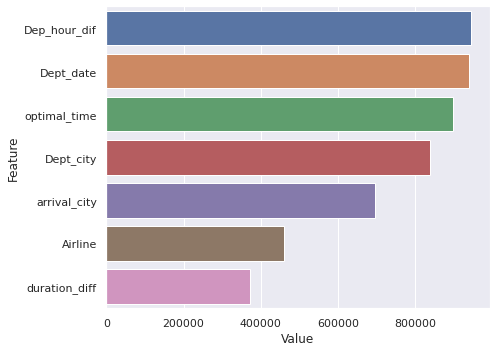

In [73]:
feature_imp= pd.DataFrame(sorted(zip(lgbm.feature_importances_, X_train.columns), reverse = True), columns = ['Value', 'Feature'])

plt.figure(figsize=(7,5))
sns.barplot(x='Value', y='Feature', data=feature_imp[:10].sort_values(by='Value', ascending=False))
plt.tight_layout()
plt.show()

In [74]:
# Predicting multiple observations
predictions = lgbm.predict(X_test[0:])

In [75]:
score = lgbm.score(X_test, y_test)
print(score)

0.814516632549018


In [76]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)


3594.1539323190063

In [77]:
metrics.mean_squared_error(y_test, predictions)

46838869.03357032

In [78]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

6843.892827446257